<a href="https://colab.research.google.com/github/RaedAbdelkefi/A-First-Course-in-Stochastic-Calculus/blob/main/Properties_of_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#1.Simulating Brownian motion using increments


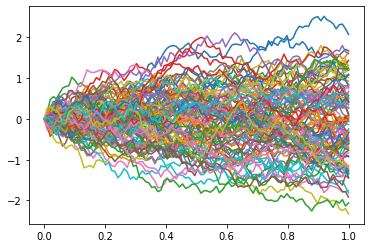

In [ ]:
n=100
def Brownian(n):
  times=np.linspace(0,1,n)
  dt=times[1]-times[0]
  dB=np.sqrt(dt)*np.random.standard_normal((n-1,n))
  B0=np.zeros((1,n))
  B=np.concatenate((B0,np.cumsum(dB,axis=0) ),axis=0)
  return B
times=np.linspace(0,1,n)
B=Brownian(n)
plt.plot(times,B)
plt.show()


#2. Simulating the Poisson process.

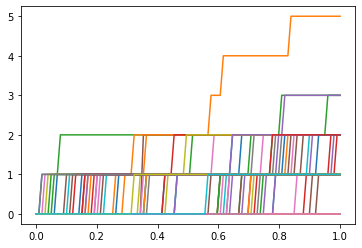

In [ ]:
n=100
lamda=1
times=np.linspace(0,1,n)
dt=times[1]-times[0]
dP=np.random.poisson(lamda*dt,(n-1,n))
P0=np.zeros((1,n))
P=np.concatenate((P0,np.cumsum(dP,axis=0) ),axis=0)
plt.plot(times,P)
plt.show()

#3.The arcsine law

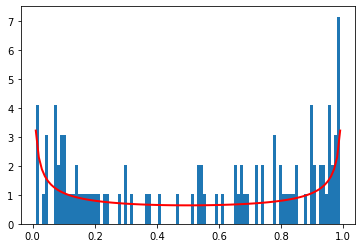

In [ ]:
B=Brownian(n)
X=np.sum(B>=0, axis=0)/101

count, bins, ignored = plt.hist(X, 100, density=True)
plt.plot(bins,(1/np.pi)*(1/np.sqrt(bins*(1-bins))),linewidth=2,color='r')

#4.Arcsine law for Ornstein-Uhlenbeck

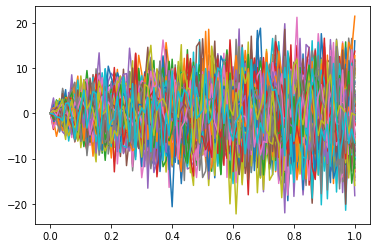

In [ ]:
cov =np.zeros((n,n))
for i in range(n):
  for j in range(n):
    cov[i][j]=(np.exp(-2*np.linalg.norm(i-j))/2*100)*(1-np.exp(-2*min(i+1,j+1)/100))
A=np.linalg.cholesky(cov)
Z=np.random.standard_normal((n,n))
Y=A@Z
t=np.linspace(0,1,101)
Y=np.insert(Y,0,np.zeros(n,int),axis=0)
plt.plot(t,Y)
plt.show()

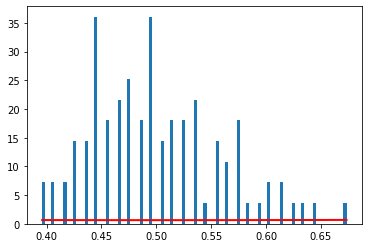

arcsin law is not applicable for Orstein-Uhlenbeck


In [ ]:
X=np.sum(Y>=0, axis=0)/101

count, bins, ignored = plt.hist(X, 100, density=True)
plt.plot(bins,(1/np.pi)*(1/np.sqrt(bins*(1-bins))),linewidth=2,color='r')
plt.show()
print('arcsin law is not applicable for Orstein-Uhlenbeck')

#5. Brownian variations

In [ ]:

def f(n):
  times=np.linspace(0,1,2**n)
  dt=times[1]-times[0]
  dB=np.sqrt(dt)*np.random.standard_normal(2**n-1)
  B0=np.zeros(1)
  B=np.concatenate((B0,np.cumsum(dB) ))
  V=np.sum([np.linalg.norm(B[i+1]-B[i]) for i in range(2**n-1)])
  Q=np.sum([(B[i+1]-B[i])**2 for i in range(2**n-1)])
  return Q,V
Q=np.zeros((20,1))
V=np.zeros((20,1))
for i in range(1,21):
  Q1,V1=f(i)
  Q[i-1]=Q1
  V[i-1]=V1
A=np.concatenate((Q,V), axis=1)
n=np.linspace(1,20,20)


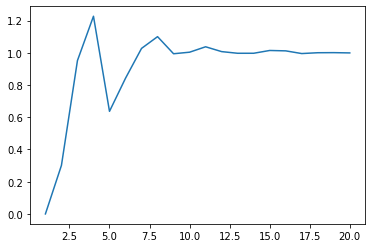

it converges to 1


In [ ]:
plt.plot(n,Q)
plt.show()
print("it converges to 1")

It diverges , so it has unbounded variation


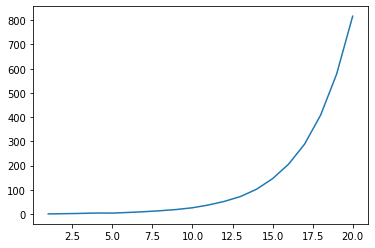

In [ ]:
plt.plot(n,A[:,1])
print('It diverges , so it has unbounded variation')

#6.Simulating Brownian motion using Lévy’s construction

In [ ]:
def delta(t):
  if 0<=t and t<=0.5:
    return t
  elif 0.5<=t and t<=1:
    return 1-t
  else :
    return 0

In [ ]:
def decompose(n):
  j=int(np.log(n)/np.log(2))
  k=n-2**j
  return j 

In [ ]:
def Levy(Z,t,N) :
  
  B=t*Z[0]+sum([2**-(decompose(n)/2)*delta(t*2**(decompose(n))-(n-(2**decompose(n))))*Z[n] for n in range(1,N+1)])
  return B

In [ ]:
def B_L(N):
  times=np.linspace(0,1,100)

  for i in range(10):
    B=list()
    Z=np.random.standard_normal(N+1)
    for t in times:
      B.append(Levy(Z,t,N))
    plt.plot(times,B)
  plt.show()

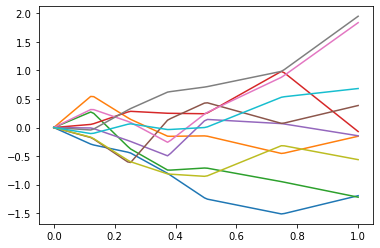

In [ ]:
B_L(5)

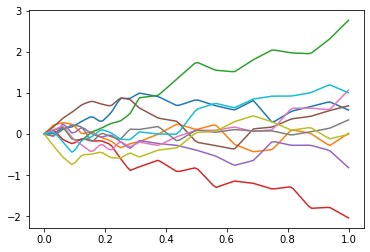

In [ ]:
B_L(20)

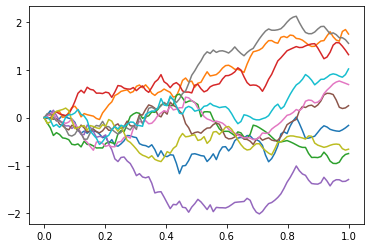

In [ ]:
B_L(100)